# Task 5 - Data Analysis

- Data analysis of our [data set](https://archive.ics.uci.edu/ml/datasets/Air+Quality) where we will begin to answer the following research questions.

1. What times of day have the highest (and lowest) air pollution?

2. Why do the two Tungsten Oxides (NOx and NO2) have such a negative correlation?


In [1]:
# load data
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print(os.getcwd())
from thierry.project_functions import load_and_process 
df = load_and_process('https://raw.githubusercontent.com/data301-2020-winter2/course-project-group_1050/main/data/raw/AirQualityUCI.csv')

C:\Users\t_mar\Documents\school stuff\UBCO year 1\DATA 301\course-project-group_1050\analysis


### 1. What times of day have the highest (and lowest) air pollution

In [2]:
## time_df gets the mean of each column for each time of measurement (hourly)
time_df = df.groupby('Time').mean()
time_df = time_df.reset_index()
time_df.head()

,Time,Cobalt (GT),Tin Oxide (CO),Non-metallic Hydrocarbons (GT),Benzene (GT),Titania (NMHC),Nitrogen Oxide (GT),Tungsten Oxide (NOx),Nitric Oxide (GT),Tungsten Oxide (NO2),Indium Oxide (O3),Temperature (C),Relative Humidity (%),Absolute Humidity (%)
0,00.00.00,1.786018,1065.008065,103.128205,7.684140,869.311828,190.419643,848.615591,103.321429,1387.413978,999.086022,16.108065,55.420430,105.352070
1,01.00.00,1.467802,1003.823529,76.973684,5.991711,795.973262,157.332335,912.919786,90.502994,1329.358289,902.911765,15.723797,56.547861,105.224171
2,02.00.00,1.099062,943.925333,61.868421,4.379467,715.544000,118.581325,1002.032000,75.436747,1274.546667,802.816000,15.285867,57.818933,104.837147
3,03.00.00,0.888462,904.082447,52.972973,3.379255,658.513298,114.576923,1081.172872,80.115385,1238.138298,733.337766,14.836702,59.039096,104.198085
4,04.00.00,0.758659,884.766578,40.189189,2.916711,630.899204,81.153614,1120.830239,58.620482,1221.496021,700.159151,14.436605,60.215119,103.755093


<AxesSubplot:title={'center':'Mean Daily Airbourne Metallic Oxides'}, xlabel='Time of Day', ylabel='Metal Oxide Values'>

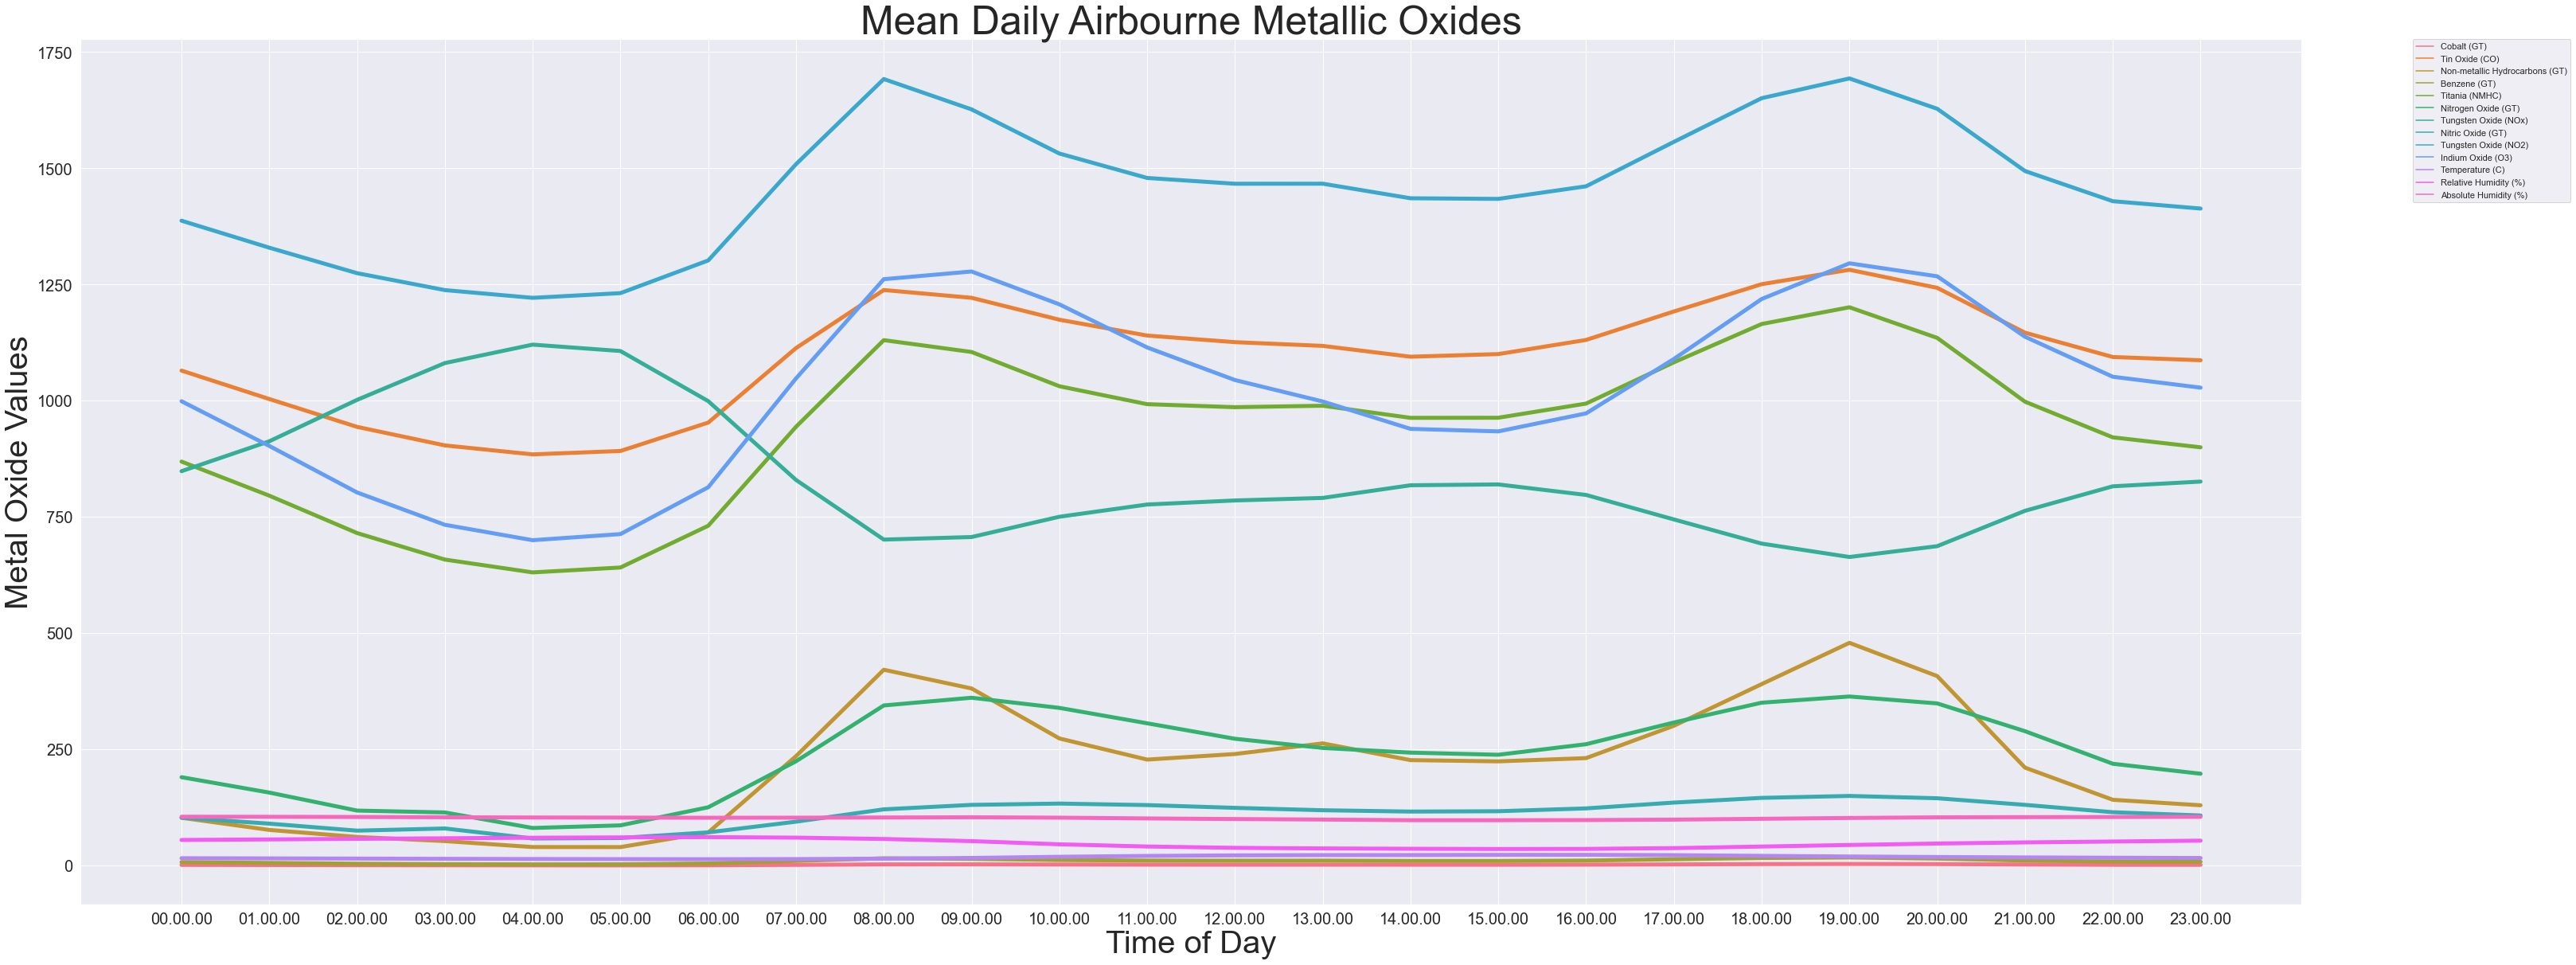

In [3]:
sns.set(rc={'figure.figsize':(50,20)})
time_plot = sns.lineplot(x='Time',
            y='value',
            hue='variable',  
            linewidth=5,
            data= pd.melt(time_df, ['Time']))
time_plot.axes.set_title('Mean Daily Airbourne Metallic Oxides', fontsize=50)
time_plot.set_xlabel('Time of Day', fontsize=40)
time_plot.set_ylabel('Metal Oxide Values', fontsize=40)
time_plot.tick_params(labelsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
time_plot



*Time plot analysis*
<br>
There are two obvious peaks in airbourne metal oxides: between 7 and 10 AM, and between 5 and 9 PM. This is most likely due to increase commuter activity during rush hours. There is also a low between 4 and 5 AM.

### 2. Why do the two Tungsten Oxides have such a negative correlation

In [4]:
tungsten_data = pd.DataFrame({'Temperature (C)':df['Temperature (C)'],
                             'Tungsten Oxide (NOx)':df['Tungsten Oxide (NOx)'],
                             'Tungsten Oxide (NO2)':df['Tungsten Oxide (NO2)']})
tungsten_data.head()

,Temperature (C),Tungsten Oxide (NOx),Tungsten Oxide (NO2)
0,13.6,1056.0,1692.0
1,13.3,1174.0,1559.0
2,11.9,1140.0,1555.0
3,11.0,1092.0,1584.0
4,11.2,1205.0,1490.0


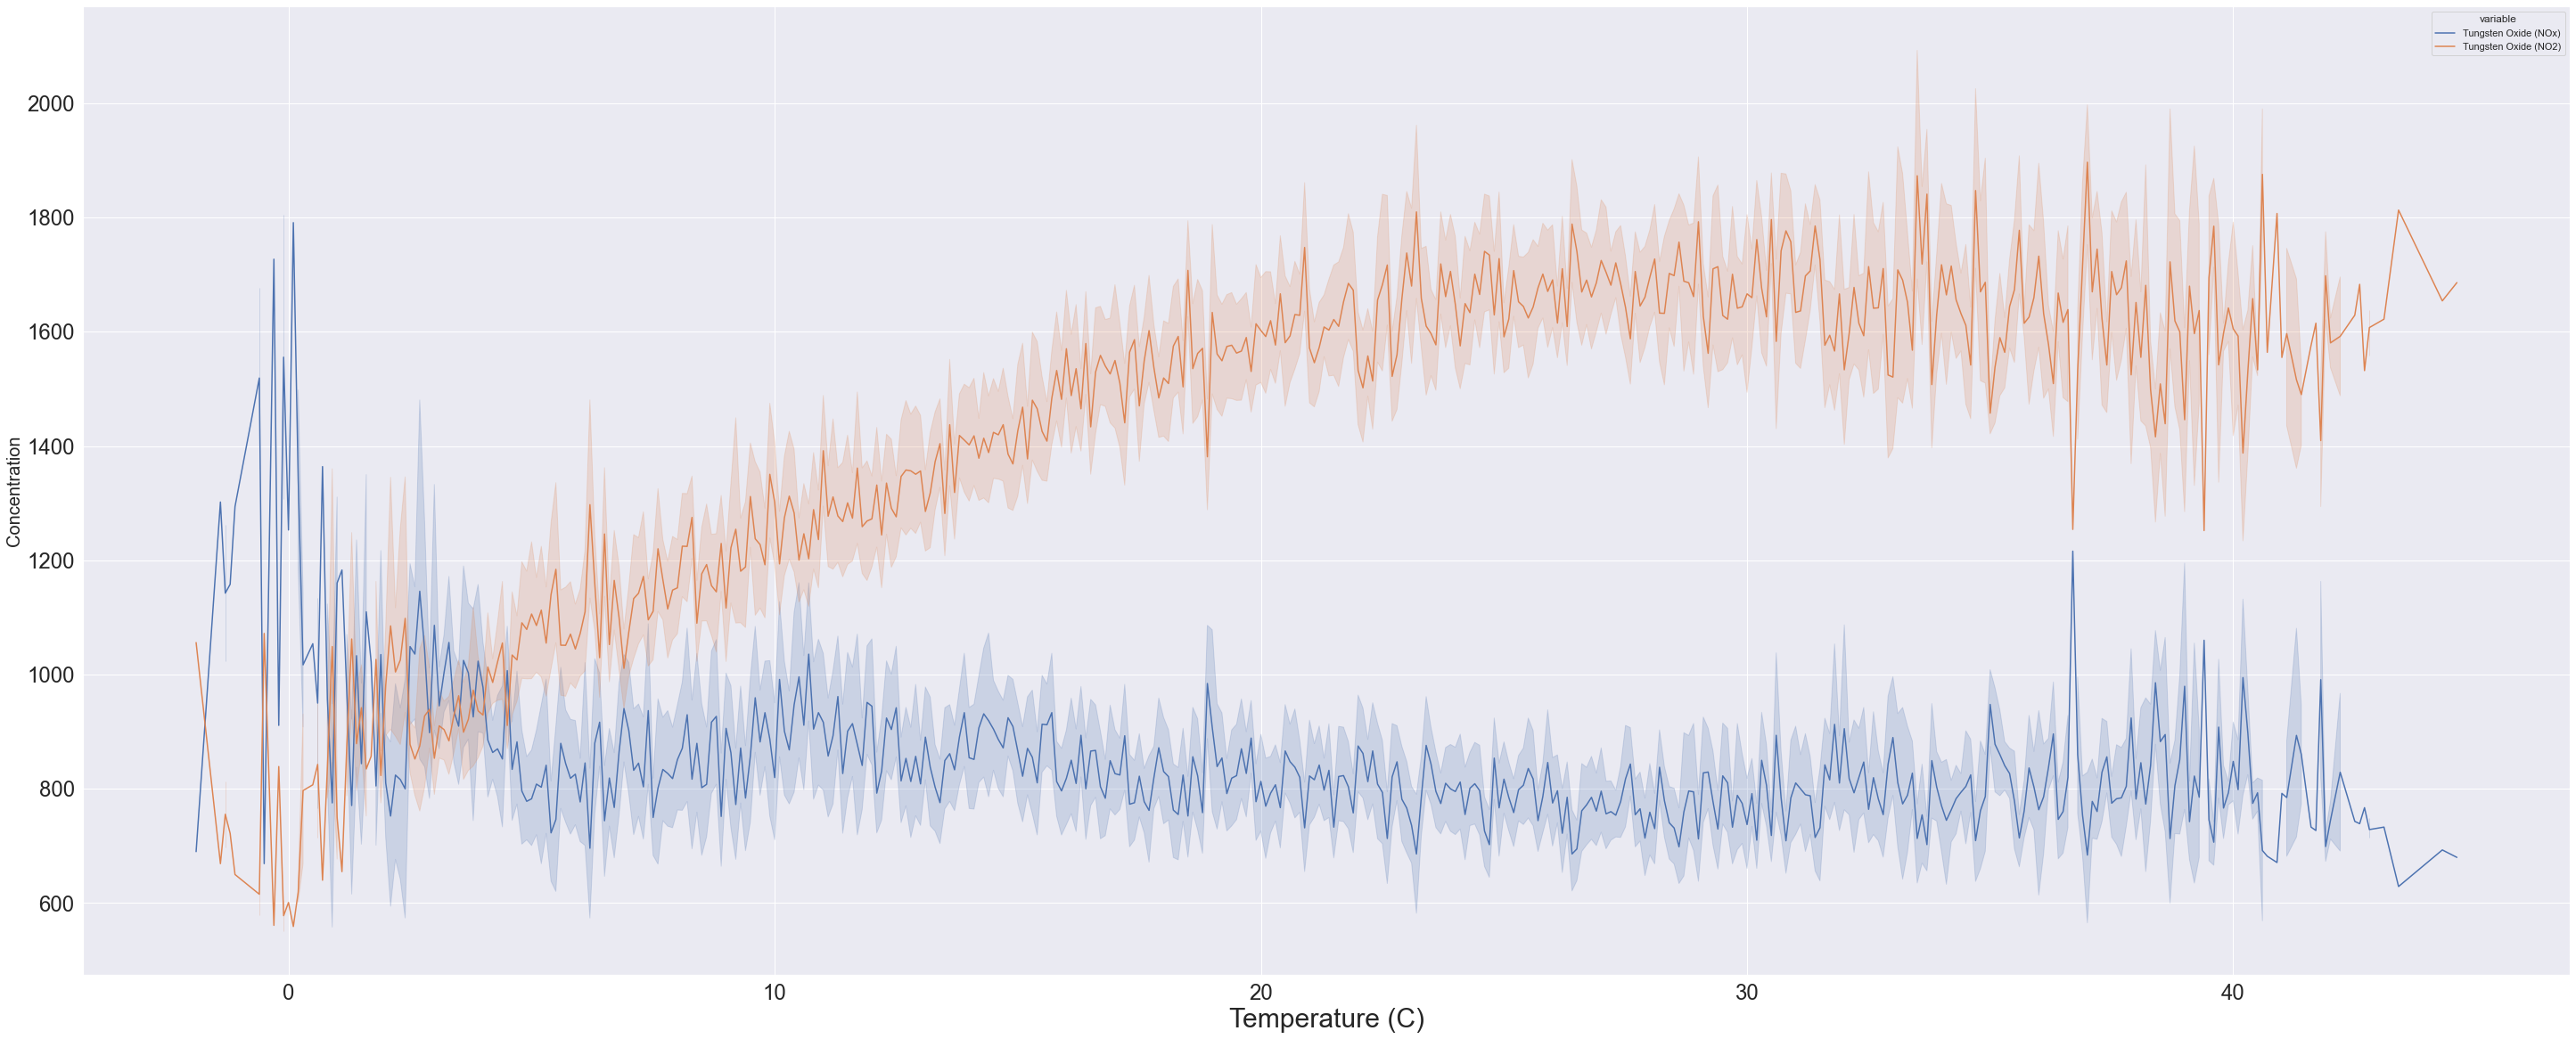

In [5]:

res = sns.lineplot(x='Temperature (C)',
            y='value',
            hue='variable',
            data= pd.melt(tungsten_data, ['Temperature (C)']))
res.set_xlabel("Temperature (C)",fontsize=30)
res.set_ylabel("Concentration",fontsize=20)
res.tick_params(labelsize=24)

*Tungsten Oxide Analysis* 
<br>
As we can see tungsten NOX is high during low temps and as they climb tungsten NO2 overtakes it, however, is it due to temperature or other factors?

Text(0.5, 1.0, 'Tunsgten correlation')

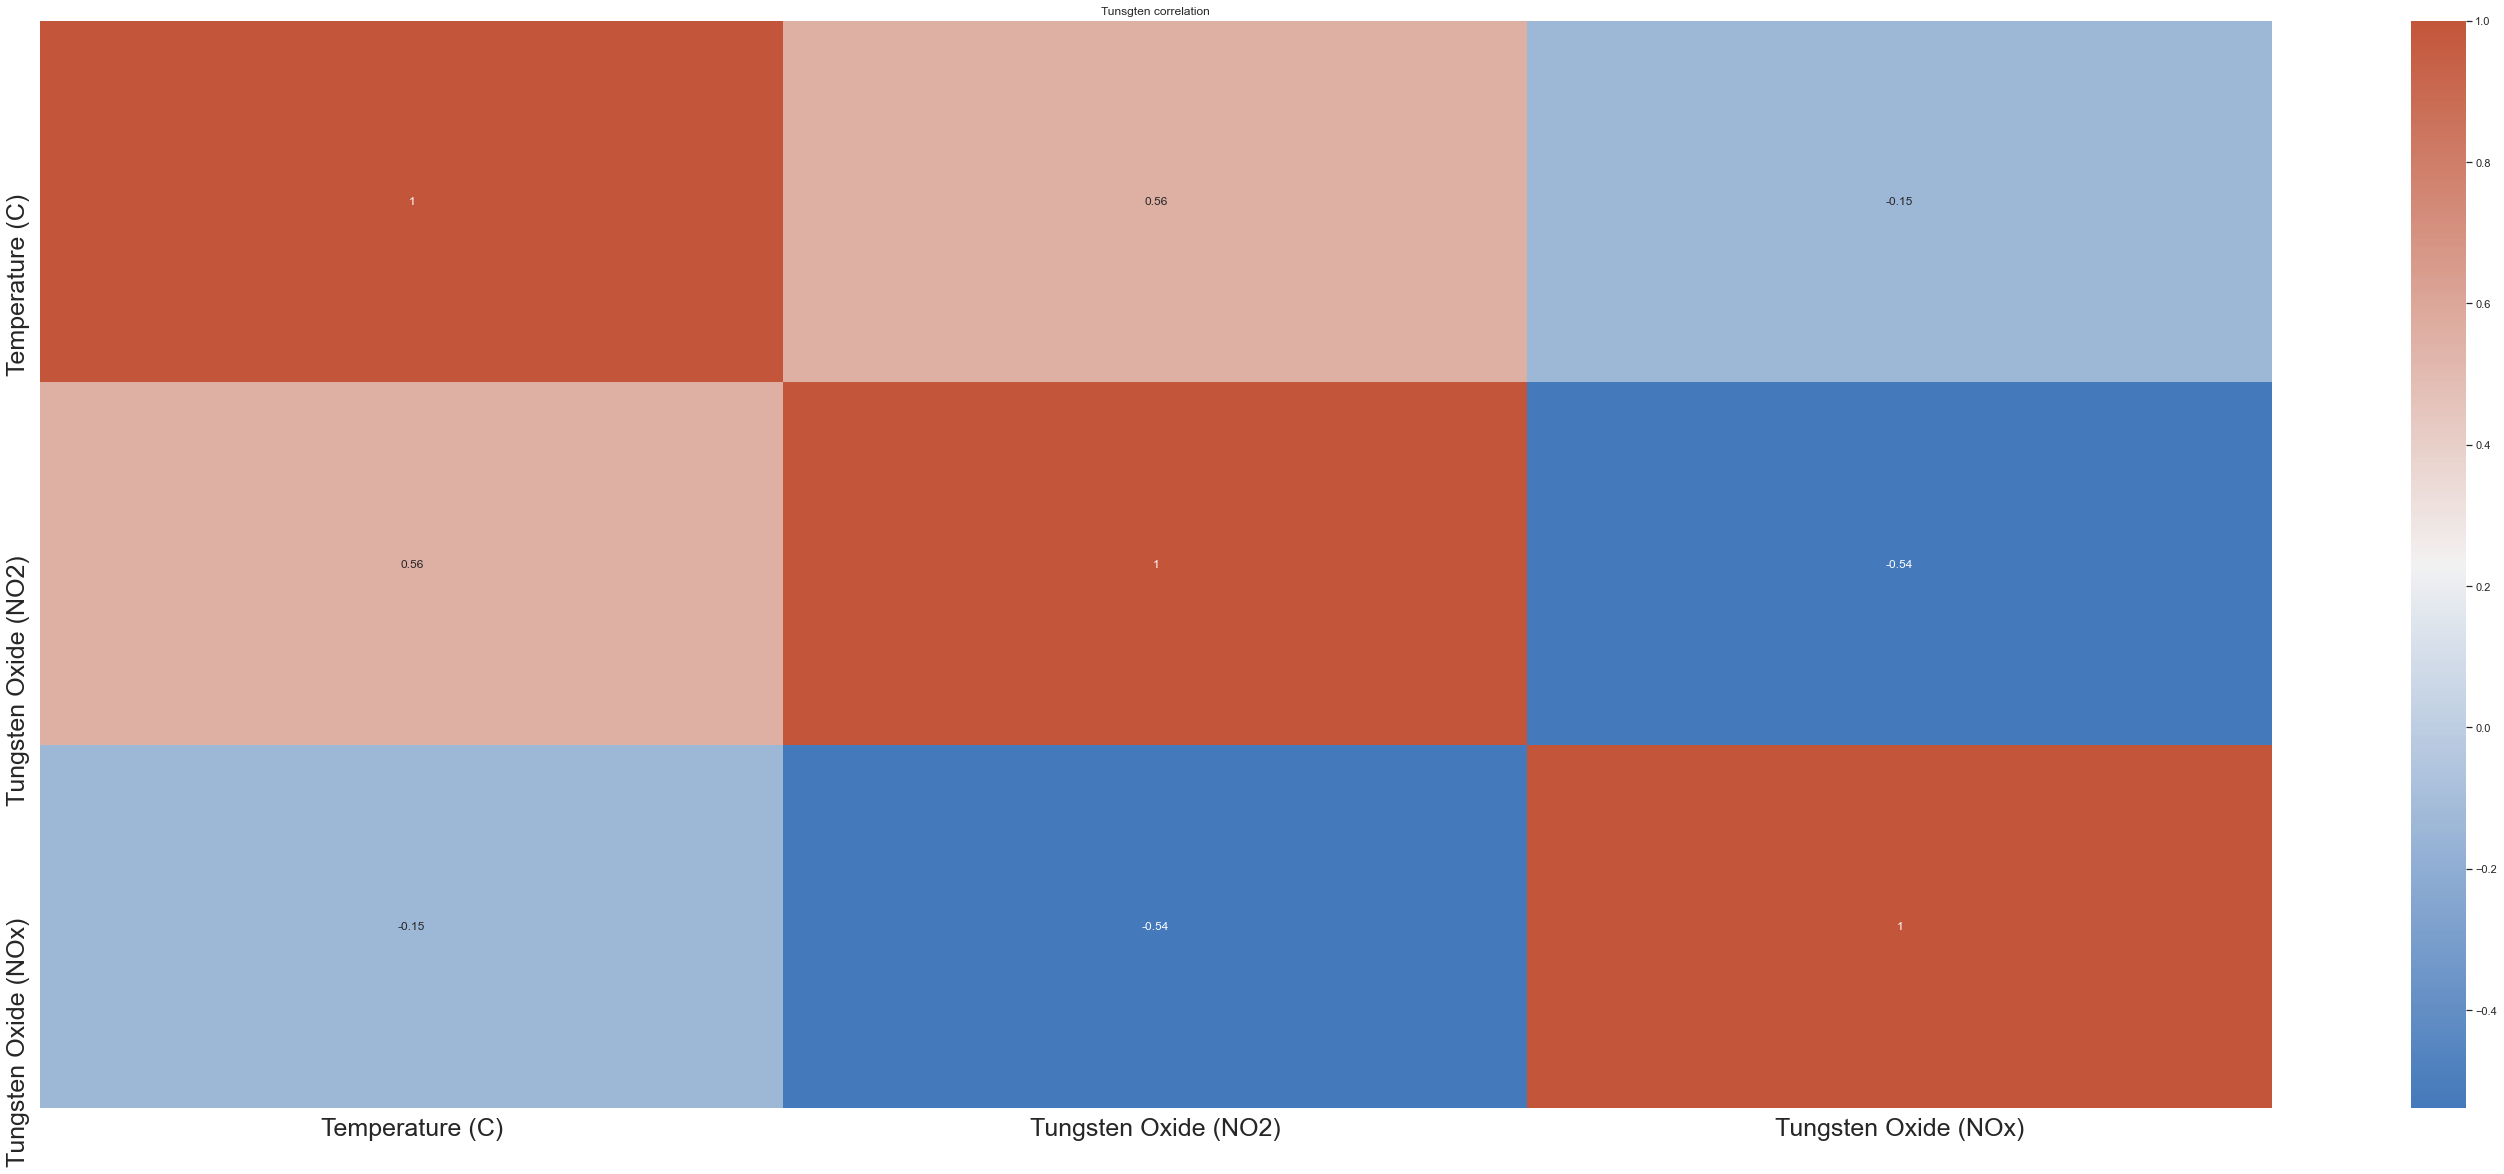

In [6]:
df1 = df[['Temperature (C)', 'Tungsten Oxide (NO2)', 'Tungsten Oxide (NOx)']].copy()
corr = df1.corr()# plot the heatmap
res = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(250, 20, as_cmap=True))
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 25)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 25)
plt.title('Tunsgten correlation')

           


*Correlation analysis*
<br>
As we can see NO2 is has a moderate positive correlation to temperature, however, NOx has a weak negative correlation to temperature. However, they both have moderate negative correlations so maybe their concentrations are dependant on something else.
<br>
*__Could be__* 
- Time of the day?
- Time of year?



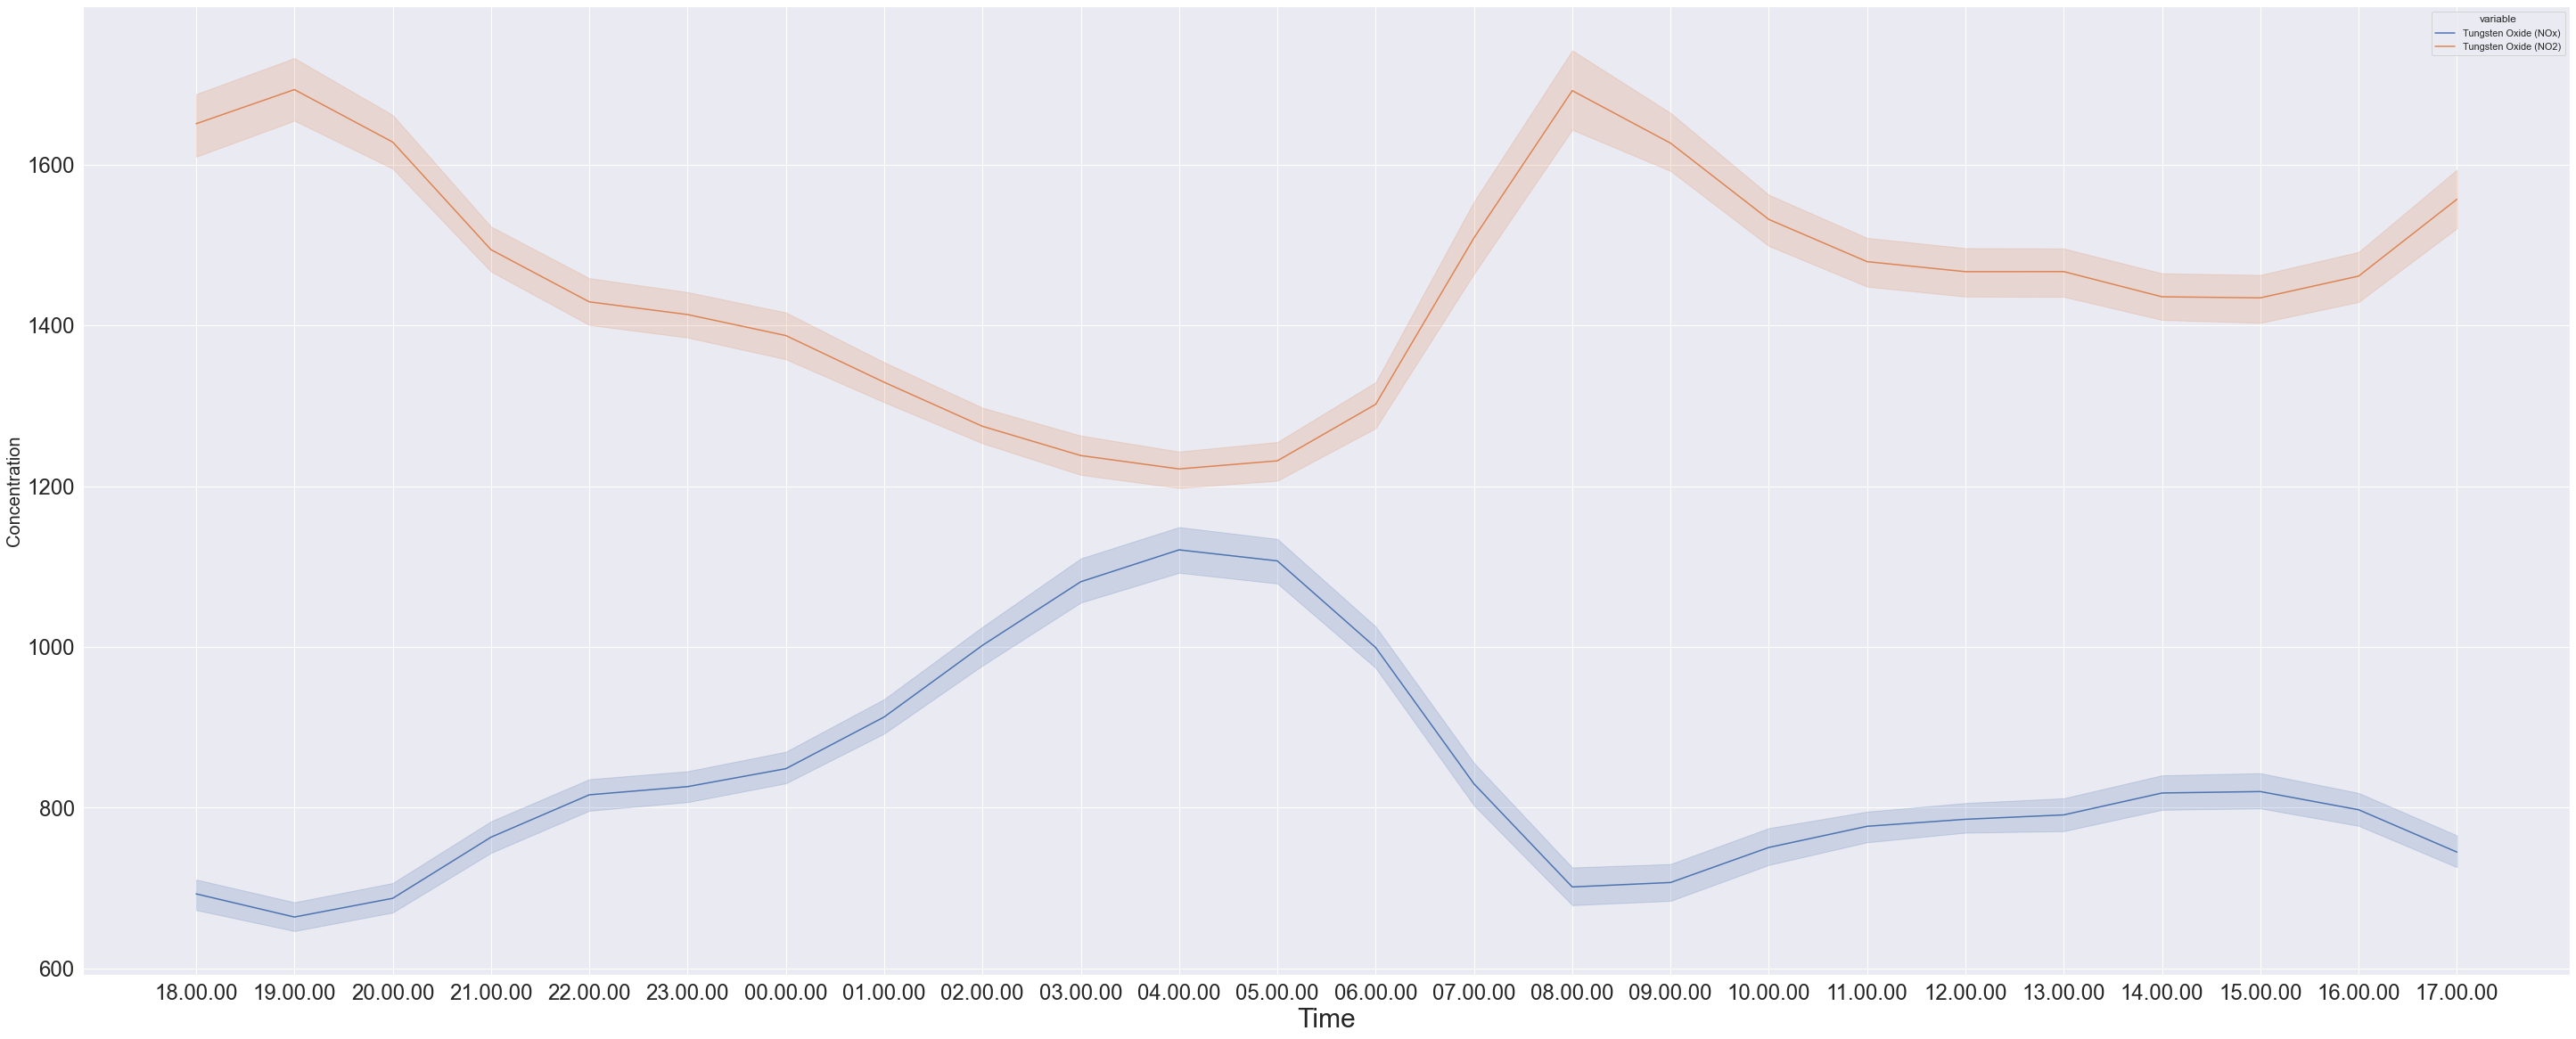

In [7]:
df2 = pd.DataFrame({'Time':df['Time'],
                             'Tungsten Oxide (NOx)':df['Tungsten Oxide (NOx)'],
                             'Tungsten Oxide (NO2)':df['Tungsten Oxide (NO2)']})
res = sns.lineplot(x='Time',
            y='value',
            hue='variable',
            data= pd.melt(df2, ['Time']))
res.set_xlabel("X Label",fontsize=30)
res.set_ylabel("Y Label",fontsize=20)
res.set(xlabel='Time', ylabel='Concentration')
res.tick_params(labelsize=24)


*Time analysis*
<br>
Nothing notable here besides the dip & increase between 0000 & 0800 but that most likely correlates to a temperature drop

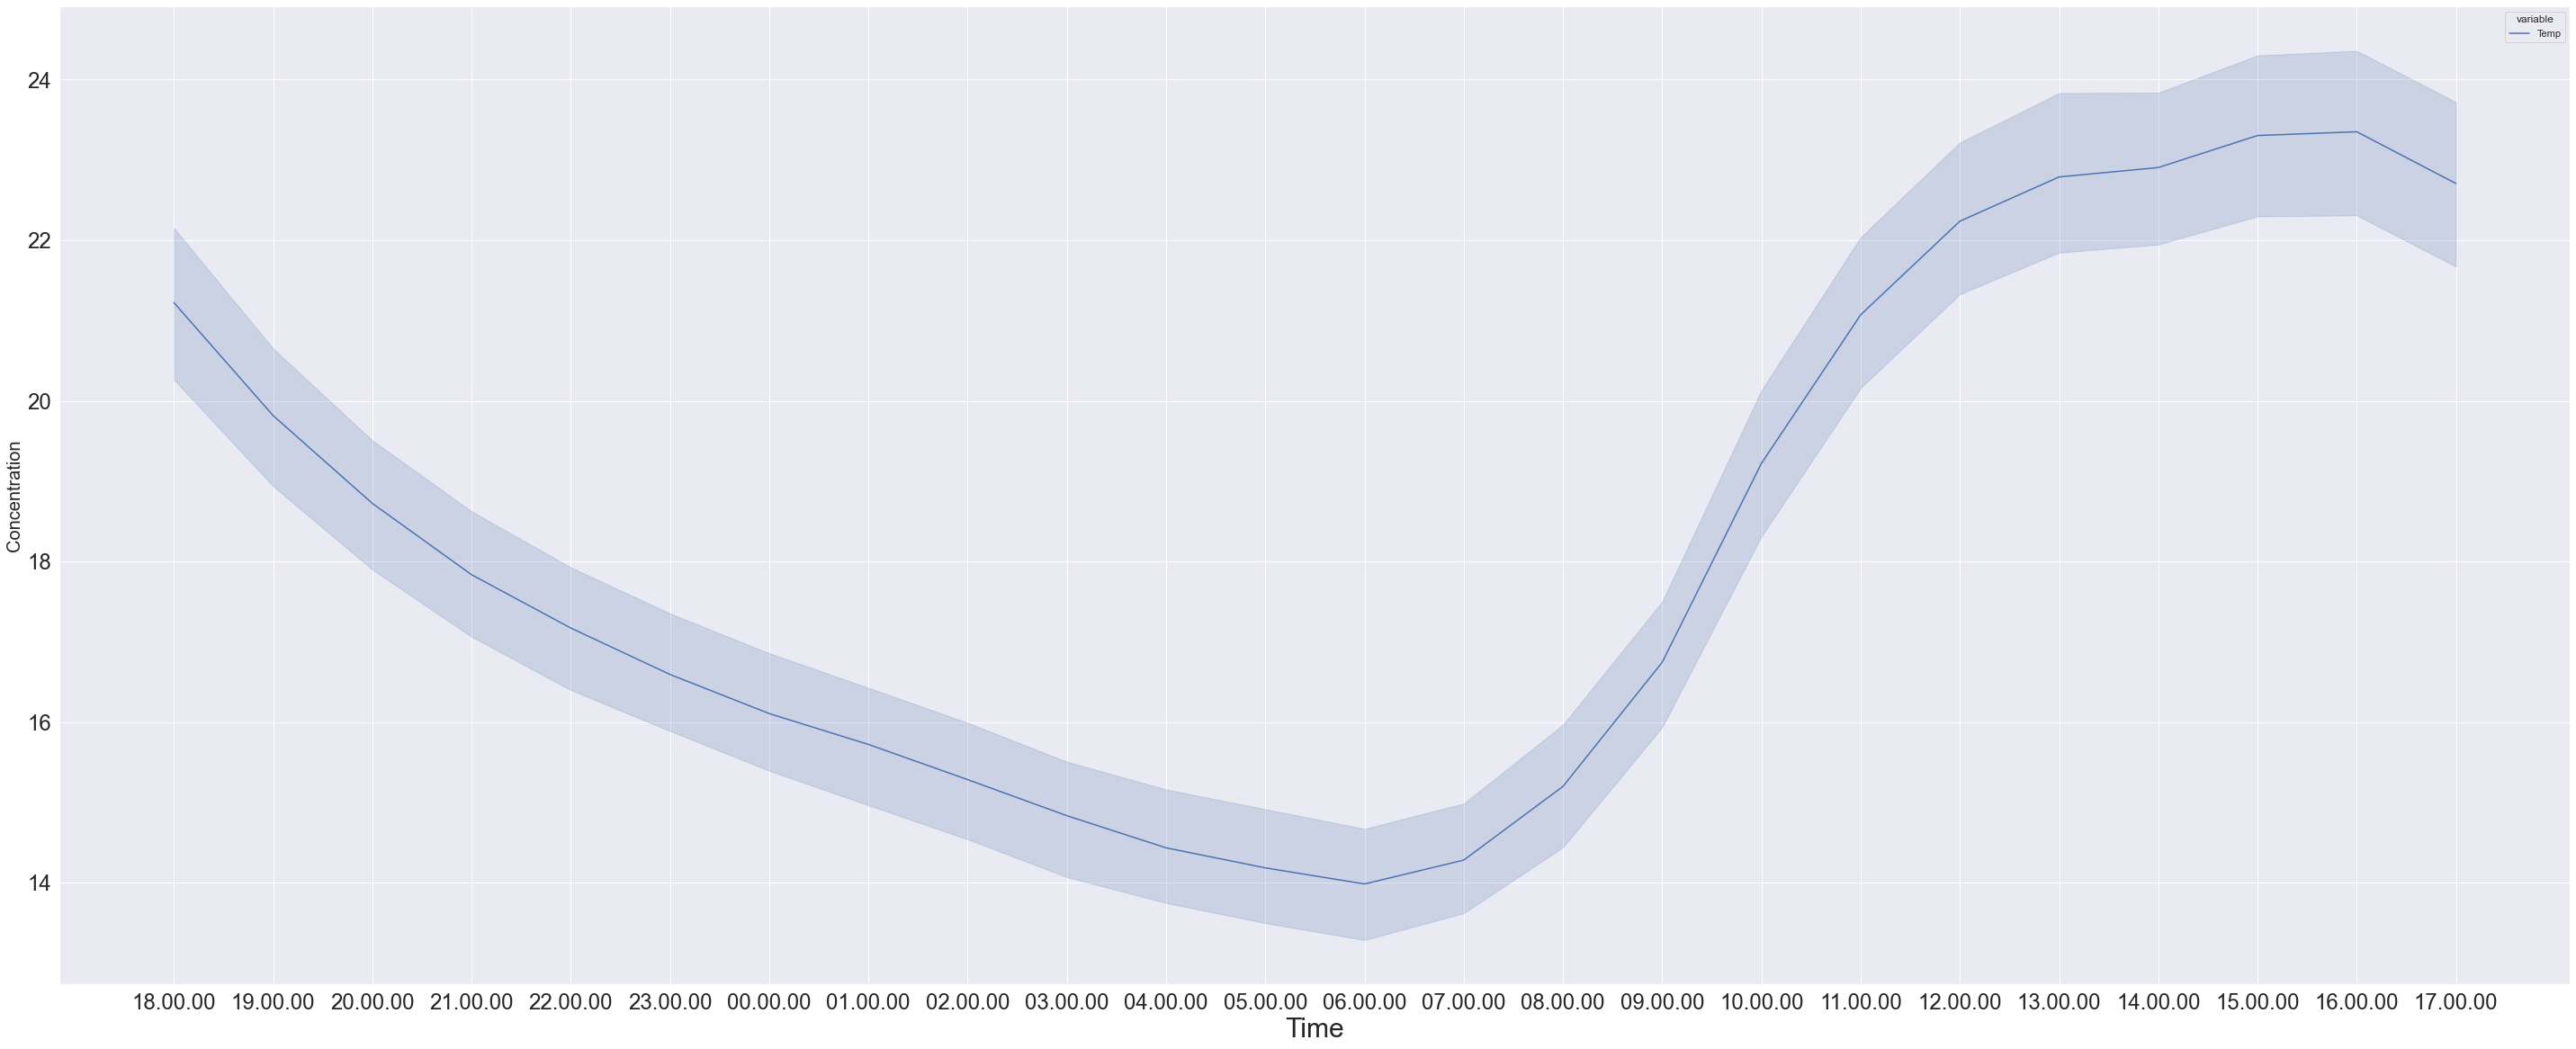

In [8]:
df2 = pd.DataFrame({'Time':df['Time'],
                             'Temp':df['Temperature (C)']})
res = sns.lineplot(x='Time',
            y='value',
            hue='variable',
            data= pd.melt(df2, ['Time']))
res.set_xlabel("X Label",fontsize=30)
res.set_ylabel("Y Label",fontsize=20)
res.set(xlabel='Time', ylabel='Concentration')
res.tick_params(labelsize=24)

*Temp analysis*
<br>
as predicted above it is due to the temps dropping

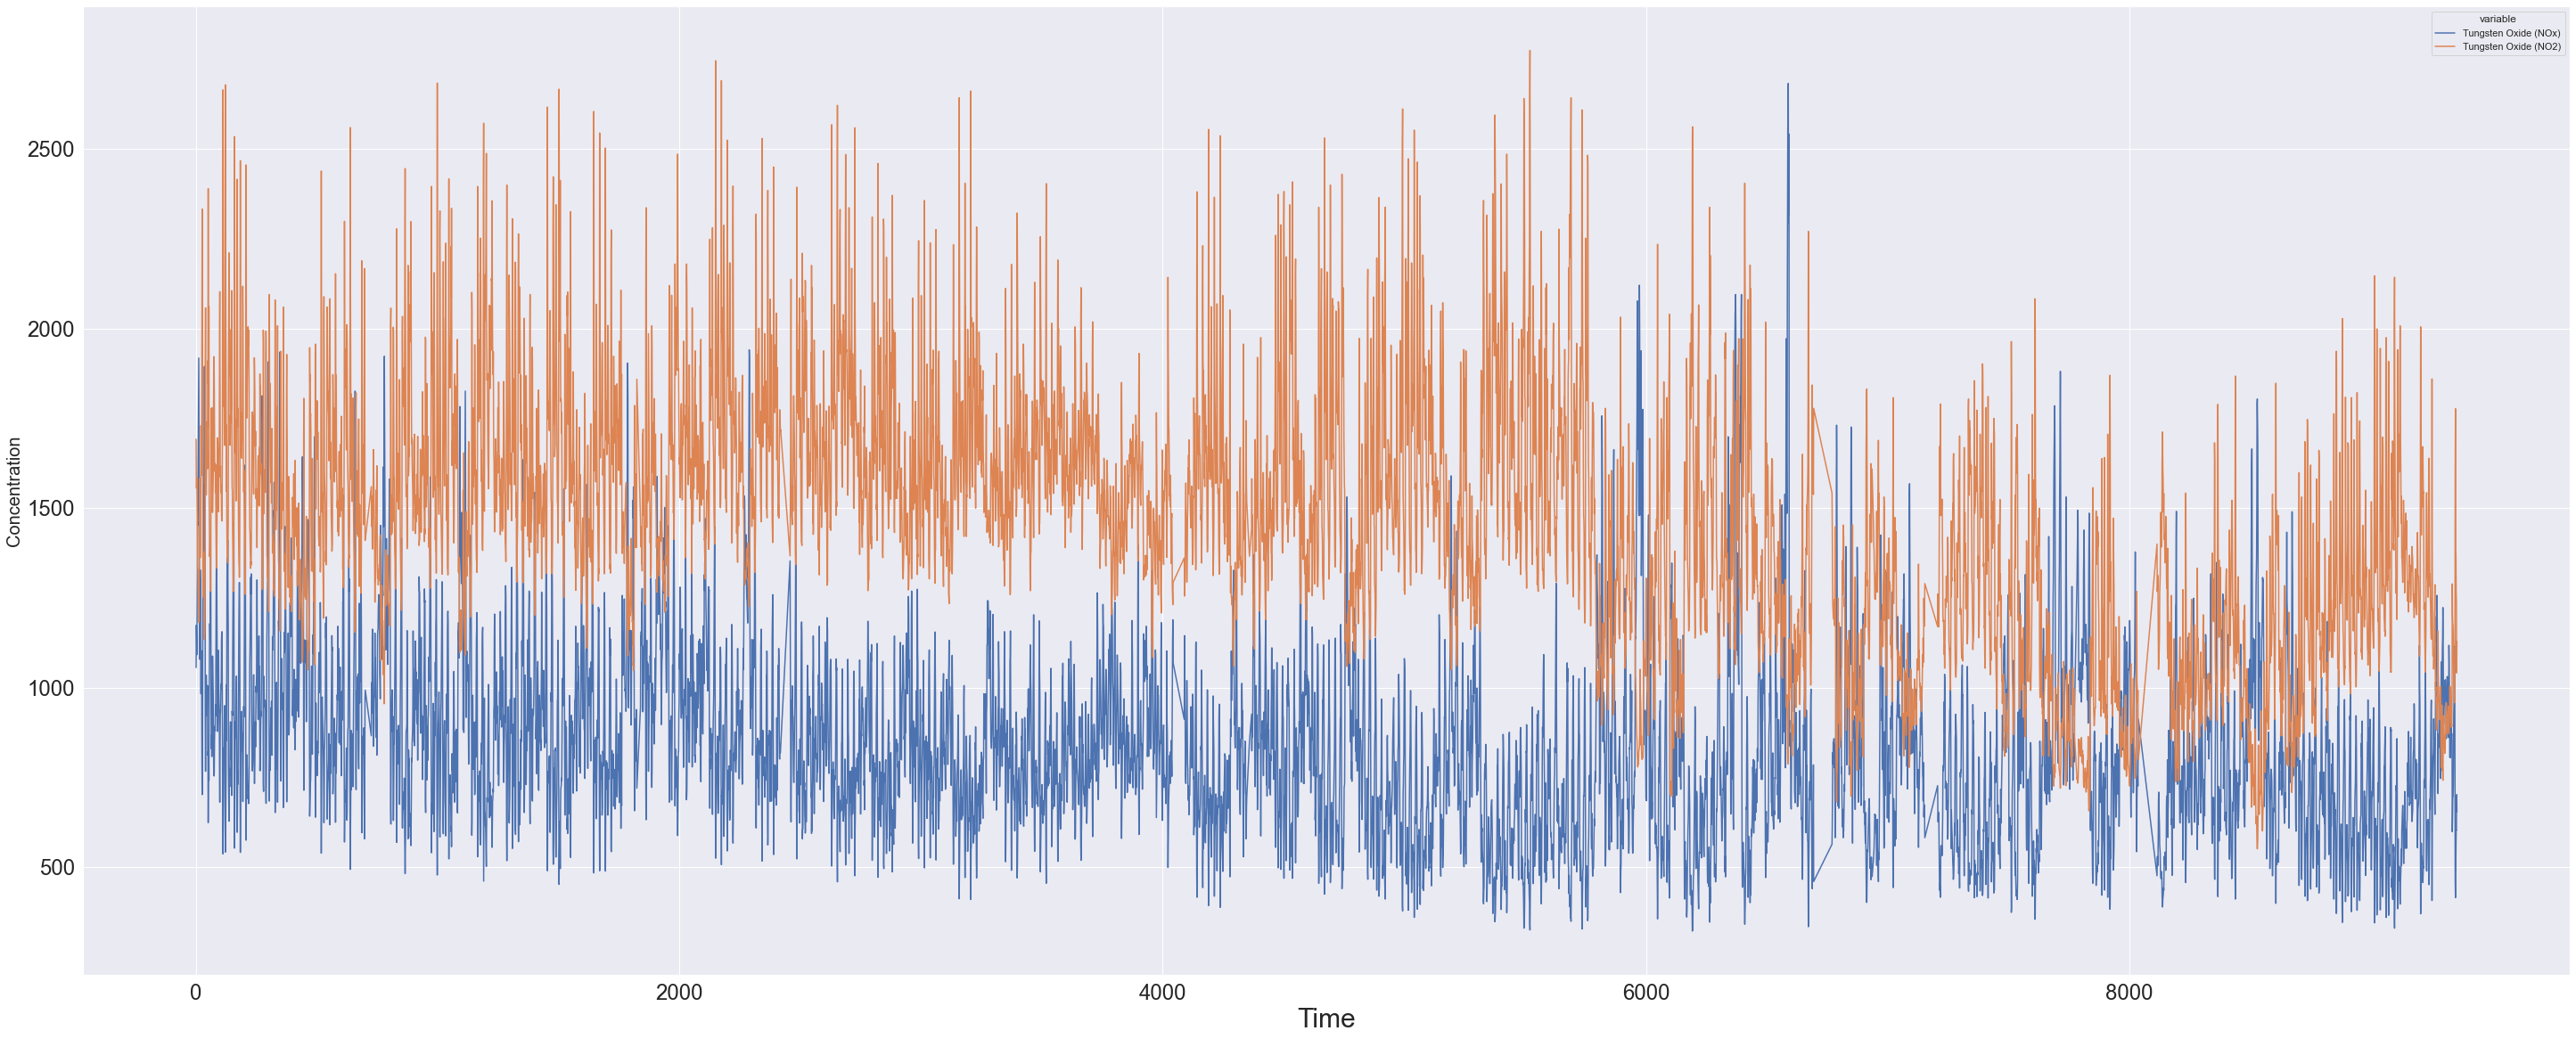

In [9]:

df2 = pd.DataFrame({'Time':df['Time'],
                             'Tungsten Oxide (NOx)':df['Tungsten Oxide (NOx)'],
                             'Tungsten Oxide (NO2)':df['Tungsten Oxide (NO2)']})
df2.insert(0, 'Count', range(0,len(df2)))

df2.drop(labels='Time', axis =1)
df2
df2 = pd.DataFrame({'Count':df2['Count'],
                             'Tungsten Oxide (NOx)':df2['Tungsten Oxide (NOx)'],
                             'Tungsten Oxide (NO2)':df2['Tungsten Oxide (NO2)']})


res = sns.lineplot(x='Count',
            y='value',
            hue='variable',
            data= pd.melt(df2, ['Count']))
res.set_xlabel("X Label",fontsize=30)
res.set_ylabel("Y Label",fontsize=20)
res.set(xlabel='Time', ylabel='Concentration')
res.tick_params(labelsize=24)


*longterm trend analysis*
<br>
No distinctive changes throughout the year besides an overall dip near the end of the dataset